In [1]:
import getpass
import os
import numpy as np
import sys
import matplotlib.pyplot as plt
os.environ['OMP_NUM_THREADS'] = '1' # to avoid using too many CPUs

if getpass.getuser() == "grasser": # when running from LEM
    os.environ['pRT_input_data_path'] ="/net/lem/data2/pRT_input_data"
    from mpi4py import MPI 
    comm = MPI.COMM_WORLD # important for MPI
    rank = comm.Get_rank() # important for MPI
    import matplotlib
    matplotlib.use('Agg') # disable interactive plotting
    from LIFE_retrieval.target import Target
    from LIFE_retrieval.retrieval import Retrieval
    from LIFE_retrieval.parameters import Parameters
elif getpass.getuser() == "natalie": # when testing from my laptop
    os.environ['pRT_input_data_path'] = "/home/natalie/.local/lib/python3.8/site-packages/petitRADTRANS/input_data_std/input_data"
    from target import Target
    from retrieval import Retrieval
    from parameters import Parameters

target_object = 'Sorg1'
Nlive=200 # number of live points (integer)
evtol=0.5 # evidence tolerance (float)
bayes=False

def init_retrieval(obj,Nlive,evtol,PT_type='PTknot',chem='const'):

    output=f'{obj}_N{Nlive}_e{evtol}' # output folder name
    obj = Target(obj)

    constant_params={'rv':0,
                     'log_opa_base_gray': -10,  
                    'log_P_base_gray': 3, # pressure of gray cloud deck
                    'fsed_gray': 20} # add if needed
    
    free_params = {#'rv': ([0,20],r'$v_{\rm rad}$'),
                'log_g':([1,3],r'log $g$')}
    
    if PT_type=='PTknot':
        pt_params={'T0' : ([100,1000], r'$T_0$'), # bottom of the atmosphere (hotter)
                'T1' : ([0,1000], r'$T_1$'),
                'T2' : ([0,1000], r'$T_2$'),
                'T3' : ([0,1000], r'$T_3$'),
                'T4' : ([0,1000], r'$T_4$'),
                'T5' : ([0,1000], r'$T_5$'),
                'T6' : ([0,1000], r'$T_6$')} # top of atmosphere (cooler)
        free_params.update(pt_params)

    if PT_type=='PTgrad':
        pt_params={'dlnT_dlnP_0': ([-0.4,0.4], r'$\nabla T_0$'), # gradient at T0 
                'dlnT_dlnP_1': ([-0.4,0.4], r'$\nabla T_1$'), 
                'dlnT_dlnP_2': ([-0.4,0.4], r'$\nabla T_2$'), 
                'dlnT_dlnP_3': ([-0.4,0.4], r'$\nabla T_3$'), 
                'dlnT_dlnP_4': ([-0.4,0.4], r'$\nabla T_4$'), 
                'T0': ([100,1000], r'$T_0$')} # at bottom of atmosphere
        free_params.update(pt_params)
        
    # free chemistry, define VMRs
    chemistry={'log_H2O':([-12,0],r'log H$_2$O'),
                'log_CO':([-12,0],r'log CO'),
                'log_CO2':([-12,0],r'log CO$_2$'),
                'log_CH4':([-12,0],r'log CH$_4$'),
                'log_NH3':([-12,0],r'log NH$_3$'),
                'log_HCN':([-12,0],r'log HCN'),
                'log_H2S':([-12,0],r'log H$_2$S'),
                'log_C2H2':([-12,0],r'log C$_2$H$_2$'),
                'log_C2H4':([-12,0],r'log C$_2$H$_4$'),
                'log_C2H6':([-12,0],r'log C$_2$H$_6$'),
                'log_CH3Cl':([-12,0],r'log CH$_3$Cl'),
                'log_SO2':([-12,0],r'log SO$_2$'),
                'log_OCS':([-12,0],r'log OCS'),
                'log_CS2':([-12,0],r'log CS$_2$'),
                'log_DMS':([-12,0],r'log DMS')
                }
       
    if chem=='var':
        varchem={}
        for key in chemistry.keys():
            varchem[f'{key}_0']=chemistry[key]
            varchem[f'{key}_1']=chemistry[key]
            varchem[f'{key}_2']=chemistry[key]
        chemistry=varchem

    #cloud_props={'log_opa_base_gray': ([-10,3], r'log $\kappa_{\mathrm{cl},0}$'),  
                #'log_P_base_gray': ([-6,3], r'log $P_{\mathrm{cl},0}$'), # pressure of gray cloud deck
                #'fsed_gray': ([0,20], r'$f_\mathrm{sed}$')} # sedimentation parameter for particles
    
    #free_params.update(cloud_props)
    free_params.update(chemistry)
    parameters = Parameters(free_params, constant_params)
    cube = np.random.rand(parameters.n_params)
    parameters(cube)
    retrieval=Retrieval(target=obj,parameters=parameters,output_name=output,
                        N_live_points=Nlive,evidence_tolerance=evtol,PT_type=PT_type,chem=chem)

    return retrieval

retrieval=init_retrieval(target_object,Nlive,evtol,PT_type='PTknot',chem='var')
#retrieval.PMN_lnL()
#retrieval.run_retrieval(N_live_points=Nlive,evidence_tolerance=evtol,bayes=bayes)
#retrieval.evaluate(makefigs=False)


{'CO_12_HITEMP': array([1.41153721e-11, 1.89248672e-11, 2.53730894e-11, 3.40183981e-11,
       4.56094009e-11, 6.11497769e-11, 8.19851860e-11, 1.09919791e-10,
       1.47372484e-10, 1.97586338e-10, 2.64909433e-10, 3.55171354e-10,
       4.76187993e-10, 6.38438325e-10, 8.55971803e-10, 1.14762491e-09,
       1.53865225e-09, 2.06291335e-09, 2.76580460e-09, 3.70819022e-09,
       4.97167250e-09, 6.66565792e-09, 8.93683070e-09, 1.19818545e-08,
       1.60644015e-08, 1.65068519e-08, 1.29993955e-08, 1.02372205e-08,
       8.06196597e-09, 6.34892011e-09, 4.99987060e-09, 3.93747371e-09,
       3.10082009e-09, 2.44194271e-09, 1.92306681e-09, 1.51444419e-09,
       1.19264770e-09, 9.39228103e-10, 7.39656334e-10, 5.82490549e-10,
       4.58720115e-10, 3.61249028e-10, 2.84489072e-10, 2.24039447e-10,
       1.76434452e-10, 1.38944799e-10, 1.09421130e-10, 8.61707949e-11,
       6.78608041e-11, 5.34414094e-11]), 'H2O_Exomol': array([2.60826041e-03, 1.98653095e-03, 1.51300277e-03, 1.15234921e-03,
     

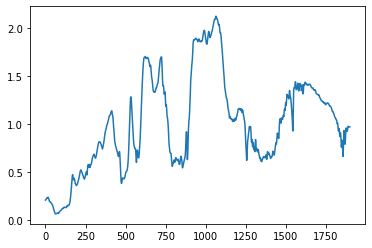

In [2]:
from pRT_model import pRT_spectrum
import matplotlib.pyplot as plt
model_object=pRT_spectrum(retrieval)
model_flux=model_object.make_spectrum()
plt.plot(model_flux)

In [3]:
model_object.mass_fractions['DMS']

array([4.12858301e-09, 5.45430615e-09, 7.20573026e-09, 9.51955155e-09,
       1.25763606e-08, 1.66147369e-08, 2.19498703e-08, 2.89981604e-08,
       3.83097165e-08, 5.06112924e-08, 6.68630090e-08, 8.83332901e-08,
       1.16697861e-07, 1.54170537e-07, 2.03676009e-07, 2.69078108e-07,
       3.55481378e-07, 4.69629473e-07, 6.20431492e-07, 8.19657323e-07,
       1.08285626e-06, 1.43057062e-06, 1.88993902e-06, 2.49681452e-06,
       3.29856291e-06, 4.85415280e-06, 7.95705385e-06, 1.30434102e-05,
       2.13810980e-05, 3.50484535e-05, 5.74523388e-05, 9.41773720e-05,
       1.54378004e-04, 2.53060450e-04, 4.14823288e-04, 6.79989151e-04,
       1.11465595e-03, 1.82717309e-03, 2.99514978e-03, 4.90972763e-03,
       8.04815355e-03, 1.31927432e-02, 2.16258886e-02, 3.54497205e-02,
       5.81101063e-02, 9.52556016e-02, 1.56145466e-01, 2.55957720e-01,
       4.19572568e-01, 6.87774295e-01])

In [4]:
retrieval.chem

'var'

array([ 3.89093728,  3.91970072,  3.94867679,  3.97786706,  4.00727312,
        4.03689656,  4.06673899,  4.09680203,  4.12708731,  4.15759646,
        4.18833116,  4.21929306,  4.25048384,  4.2819052 ,  4.31355883,
        4.34544647,  4.37756983,  4.40993066,  4.44253071,  4.47537176,
        4.50845558,  4.54178397,  4.57535874,  4.60918171,  4.64325471,
        4.74091694,  4.9061785 ,  5.07720084,  5.25418478,  5.43733812,
        5.62687592,  5.82302074,  6.02600288,  6.2360607 ,  6.45344082,
        6.67839851,  6.91119789,  7.15211233,  7.4014247 ,  7.65942775,
        7.9264244 ,  8.20272818,  8.48866352,  8.78456614,  9.09078351,
        9.40767518,  9.73561323, 10.07498274, 10.42618217, 10.78962392])

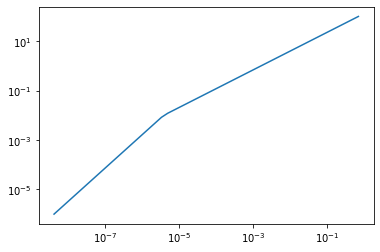

In [5]:
plt.plot(model_object.mass_fractions['DMS'],model_object.pressure)
plt.yscale('log')
plt.xscale('log')
model_object.mass_fractions['MMW']

In [13]:
model_object.mass_fractions

{'CO_12_HITEMP': array([3.95674282e-11, 3.46815027e-06, 6.93626098e-06, 1.04043717e-05,
        1.38724824e-05, 1.73405931e-05, 2.08087038e-05, 2.42768145e-05,
        2.77449252e-05, 3.12130359e-05, 3.46811466e-05, 3.81492573e-05,
        4.16173680e-05, 4.50854787e-05, 4.85535894e-05, 5.20217001e-05,
        5.54898108e-05, 5.89579215e-05, 6.24260322e-05, 6.58941429e-05,
        6.93622536e-05, 7.28303643e-05, 7.62984751e-05, 7.97665858e-05,
        8.32346965e-05, 8.32387533e-05, 7.97787562e-05, 7.63187592e-05,
        7.28587621e-05, 6.93987650e-05, 6.59387680e-05, 6.24787709e-05,
        5.90187739e-05, 5.55587768e-05, 5.20987798e-05, 4.86387827e-05,
        4.51787856e-05, 4.17187886e-05, 3.82587915e-05, 3.47987945e-05,
        3.13387974e-05, 2.78788003e-05, 2.44188033e-05, 2.09588062e-05,
        1.74988092e-05, 1.40388121e-05, 1.05788150e-05, 7.11881799e-06,
        3.65882093e-06, 1.98823869e-07]),
 'H2O_Exomol': array([1.53409339e-02, 1.47147733e-02, 1.40886127e-02, 1.346245

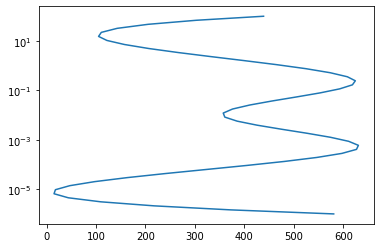

In [6]:
plt.plot(model_object.temperature,model_object.pressure)
plt.yscale('log')

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# weird format???
filename='psg_rad_Sorg1X.txt'
file1=np.genfromtxt(filename,skip_header=13,skip_footer=1488,delimiter='  ')
wl1=file1[:,0]
fl1=file1[:,1]
flerr1=np.ones_like(fl1)*1e-5
file2=np.genfromtxt(filename,skip_header=424,delimiter='  ')
wl2=file2[:,0]
fl2=file2[:,1]
flerr2=file2[:,2]
wl=np.append(wl1,wl2)
fl=np.append(fl1,fl2)
fl/=np.median(fl)
flerr=np.append(flerr1,flerr2)


/home/natalie/.local/lib/python3.8/site-packages/petitRADTRANS/radtrans.py:119: FutureWarning: pRT_input_data_path was set by an environment variable. In a future update, the path to the petitRADTRANS input_data will be set within a .ini file that will be automatically generated into the user home directory (OS agnostic), inside a .petitradtrans directory
  warnings.warn(f"pRT_input_data_path was set by an environment variable. In a future update, the path to "



  Read CIA opacities for H2-H2...
  Read CIA opacities for H2-He...
Done.



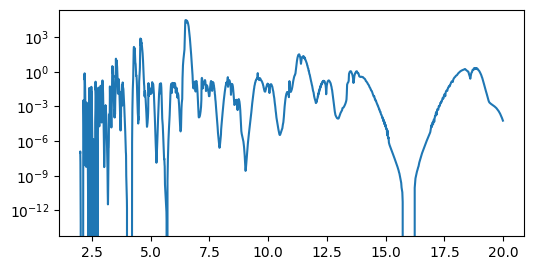

In [1]:
import os
import numpy as np
os.environ['pRT_input_data_path'] = "/home/natalie/.local/lib/python3.8/site-packages/petitRADTRANS/input_data_std/input_data"
from petitRADTRANS import Radtrans
import matplotlib.pyplot as plt

wlen_range=np.array([2,20]) # in microns for pRT
atmosphere_object = Radtrans(line_species=['CS2'],
                    rayleigh_species = ['H2', 'He'],
                    continuum_opacities = ['H2-H2', 'H2-He'],
                    wlen_bords_micron=wlen_range, 
                    mode='c-k')

T = np.array([300]).reshape(1)
wave_cm, opas = atmosphere_object.get_opa(T)
wave_um = wave_cm*1e4 # microns

fig,ax=plt.subplots(1,1,figsize=(6,3),dpi=100)
spec,=plt.plot(wave_um,opas['CS2'])
plt.yscale('log')


  Read CIA opacities for H2-H2...
  Read CIA opacities for H2-He...
Done.



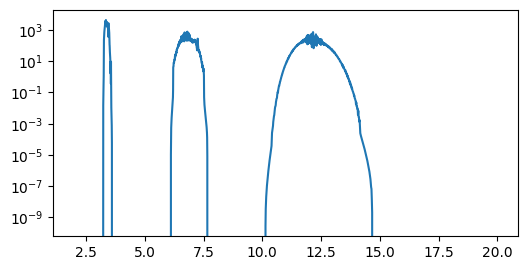

In [13]:
import os
import numpy as np
os.environ['pRT_input_data_path'] = "/home/natalie/.local/lib/python3.8/site-packages/petitRADTRANS/input_data_std/input_data"
from petitRADTRANS import Radtrans
import matplotlib.pyplot as plt

wlen_range=np.array([2,20]) # in microns for pRT
atmosphere_object = Radtrans(line_species=['C2H6'],
                    rayleigh_species = ['H2', 'He'],
                    continuum_opacities = ['H2-H2', 'H2-He'],
                    wlen_bords_micron=wlen_range, 
                    mode='c-k')

T = np.array([300]).reshape(1)
wave_cm, opas = atmosphere_object.get_opa(T)
wave_um = wave_cm*1e4 # microns

fig,ax=plt.subplots(1,1,figsize=(6,3),dpi=100)
spec,=plt.plot(wave_um,opas['C2H6'])
plt.yscale('log')


  Read CIA opacities for H2-H2...
  Read CIA opacities for H2-He...
Done.



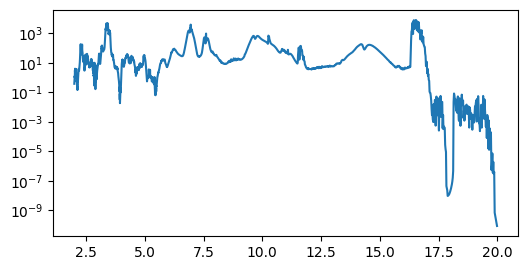

In [ ]:
import os
import numpy as np
os.environ['pRT_input_data_path'] = "/home/natalie/.local/lib/python3.8/site-packages/petitRADTRANS/input_data_std/input_data"
from petitRADTRANS import Radtrans
import matplotlib.pyplot as plt

wlen_range=np.array([2,20]) # in microns for pRT
atmosphere_object = Radtrans(line_species=['DMS'],
                    rayleigh_species = ['H2', 'He'],
                    continuum_opacities = ['H2-H2', 'H2-He'],
                    wlen_bords_micron=wlen_range, 
                    mode='c-k')

T = np.array([300]).reshape(1)
wave_cm, opas = atmosphere_object.get_opa(T)
wave_um = wave_cm*1e4 # microns

fig,ax=plt.subplots(1,1,figsize=(6,3),dpi=100)
spec,=plt.plot(wave_um,opas['DMS'])
plt.yscale('log')
